

# Project: Investigate a Dataset - [No show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

this data set contains data about:
Patient ID
Appointment ID
Gender
ScheduledDay
AppointmentDay
Age
Neighbourhood
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS receiving situation
absence


### Question(s) for Analysis
1-Does patient condition affect absence (Age,Gneder,Neighbourhood or appointment day)?
2-Does patient health situation affect absence (Age,Gneder,Neighbourhood or appointment day)?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.5MB/s eta 0:00:01  3% |█▏                              | 378kB 8.9MB/s eta 0:00:02    15% |█████                           | 1.7MB 11.7MB/s eta 0:00:01    67% |█████████████████████▊          | 7.1MB 26.7MB/s eta 0:00:01    91% |█████████████████████████████▎  | 9.6MB 28.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.2MB/s ta 0:00:011  4% |█▌                              | 614kB 15.7MB/s eta 0:00:01    9% |███                             | 1.2MB 12.0MB/s eta 0:00:02    17% |█████▌                          | 2.3MB 11.1MB/s eta 0:00:01    26% |████████▍                       | 3.5MB 11.8MB/s eta 0:00:01    33% |██████████▋                     | 4.4MB 6.8MB/s eta 0:00:02    35% |███████████▌                    | 4.8MB 6.4MB/s eta 0:00:02    44% |██████████████▎                 | 6.0MB 14.4MB/s eta 0:00:01    56% |██████████████████▏             | 7.6MB 12.5MB/s eta 0:00:01    61% |███████████████████▌            

<a id='wrangling'></a>
## Data Wrangling
in this section we search for missing or duplicated values for example Nan values , age less than zero or gender other than male or female if the data that is missing is afew raws we can just drop it using dropna if  drop it will affect or data we can use fillna with mean or zero according to the situation
here we used drop because there was only two wrong data so it will not affect or data

### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [2]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.query('Age <0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning

 

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [9]:
#remname no show because(-) may entrupt our code
df.rename(columns = {'No-show':'No_show'}, inplace = True)

In [10]:
#drop age less than zero
df.drop(index=99832,inplace= True)

In [11]:
#change appintmnetday to datetime so we can get numircal data
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


In [12]:
#collecting patient based on their no show situation
show = df.No_show == 'No'
Doesnt_show = df.No_show == "Yes"

In [13]:
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
df.drop(df[df['Handcap'] == 2].index, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis




### Does patient condition affect absence (Age,Gneder,Neighbourhood or appointment day)?

In [15]:
#A function to draw a histgram '''
def hist_plot_by(x, xlabel, ylabel):

     ax = plt.subplot(1,1,1)
     ax.hist(x)
     ax.set_xlabel(xlabel)
     ax.set_ylabel(ylabel)
     plt.show()

Exploring our data


we get to know more about our data by using visulas

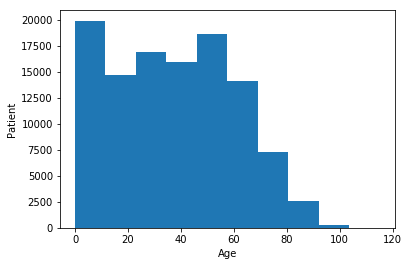

In [16]:
hist_plot_by(df['Age'], 'Age', 'Patient')

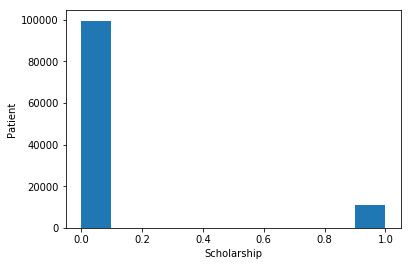

In [17]:
hist_plot_by(df['Scholarship'], 'Scholarship', 'Patient')

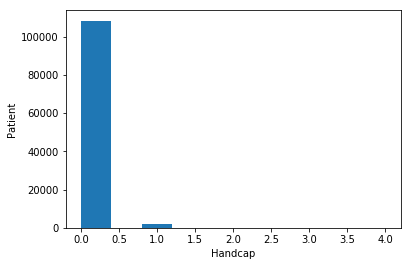

In [18]:
hist_plot_by(df['Handcap'], 'Handcap', 'Patient')

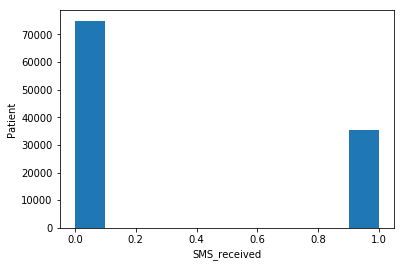

In [19]:
hist_plot_by(df['SMS_received'], 'SMS_received', 'Patient')

### Showing age effect 

age dont affact showing or no showing for the appointment

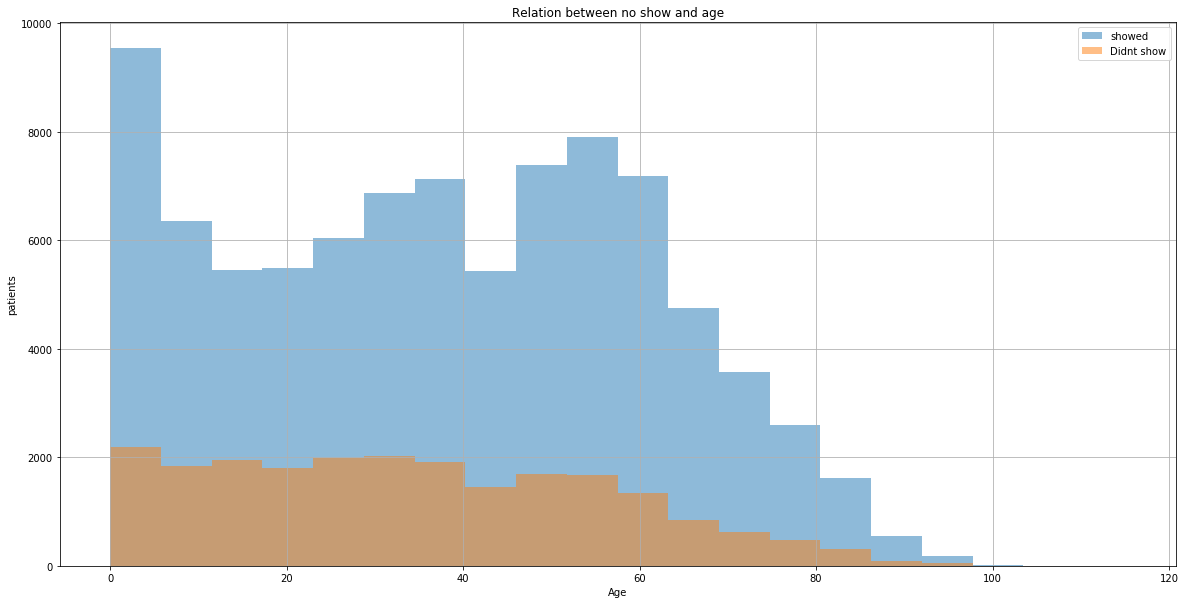

In [30]:
plt.figure(figsize=[20,10])
df.Age[show].hist(alpha=0.5, bins=20, label='showed')
df.Age[Doesnt_show].hist(alpha=0.5, bins=20, label='Didnt show')
plt.title("Relation between no show and age")
plt.xlabel("Age")
plt.ylabel("patients")
plt.legend();

### showing gender effect

gender dont affect showing or no showing for the appointment

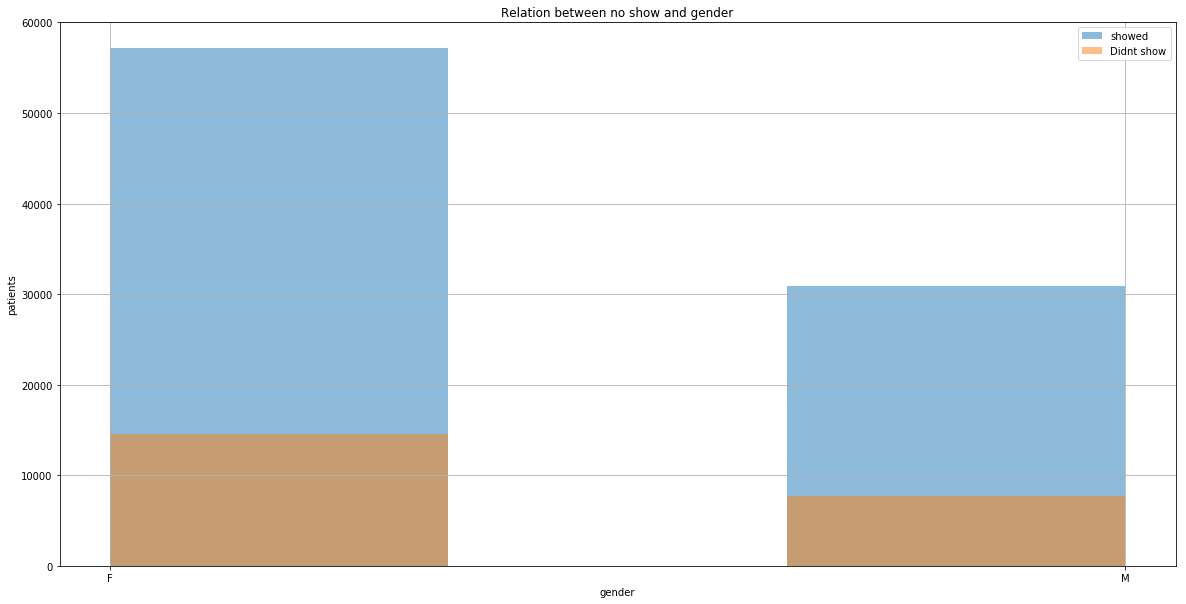

In [29]:
plt.figure(figsize=[20,10])
df.Gender[show].hist(alpha=0.5, bins=3, label='showed')
df.Gender[Doesnt_show].hist(alpha=0.5, bins=3, label='Didnt show')
plt.title("Relation between no show and gender")
plt.xlabel("gender")
plt.ylabel("patients")
plt.legend();

### showing neighbourhood effect

neighbourhood affect showing or no showing for the appointment

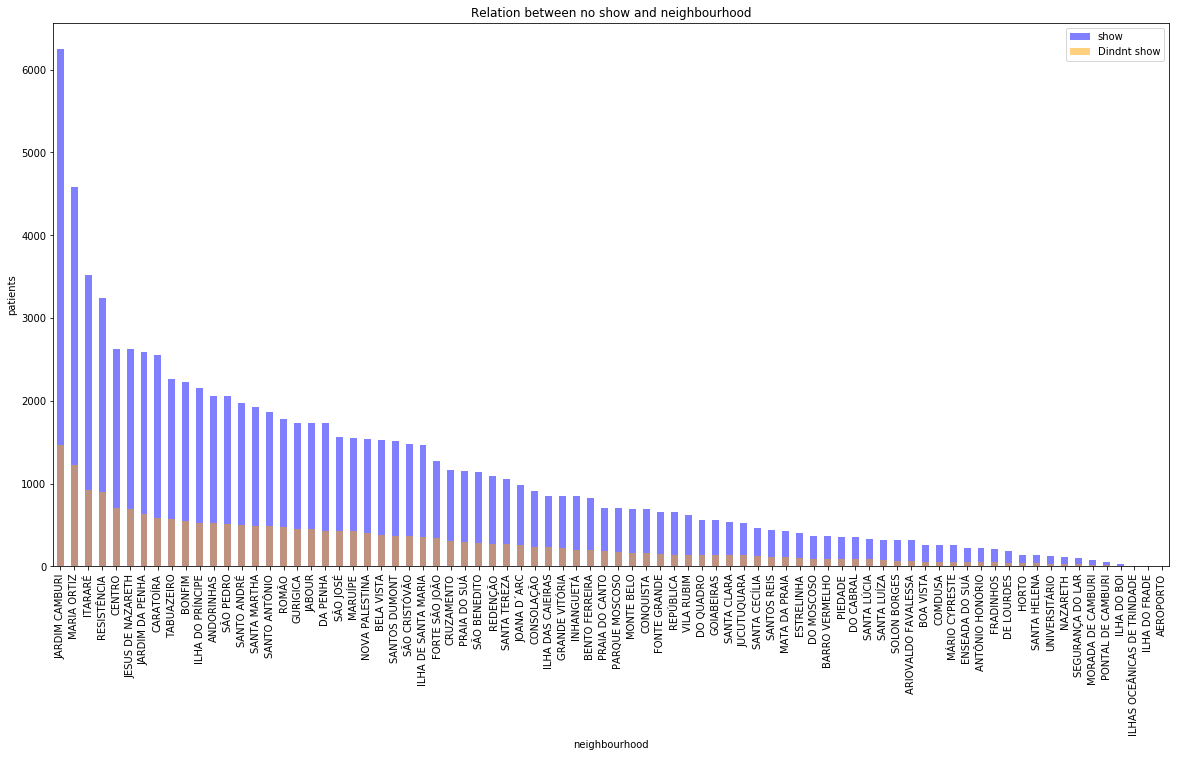

In [22]:
plt.figure(figsize=[20,10])

df.Neighbourhood[show].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='show')
df.Neighbourhood[Doesnt_show].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='Dindnt show')
plt.title("Relation between no show and neighbourhood")
plt.xlabel("neighbourhood")
plt.ylabel("patients")
plt.legend();

### showing reciving sms effect 

about half of patient that recived the sms show for the appointment but only quarter of patient that didnt recive the sms showed for the appointment

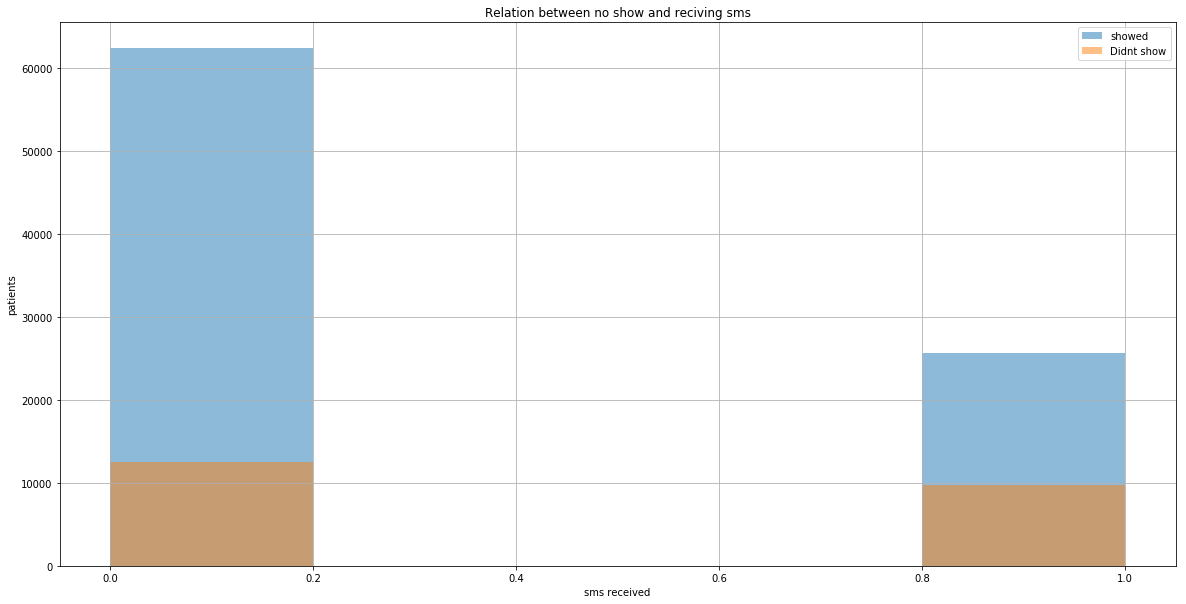

In [28]:
plt.figure(figsize=[20,10])
df.SMS_received[show].hist(alpha=0.5, bins=5, label='showed')
df.SMS_received[Doesnt_show].hist(alpha=0.5, bins=5, label='Didnt show')
plt.title("Relation between no show and reciving sms")
plt.xlabel("sms received")
plt.ylabel("patients")
plt.legend();

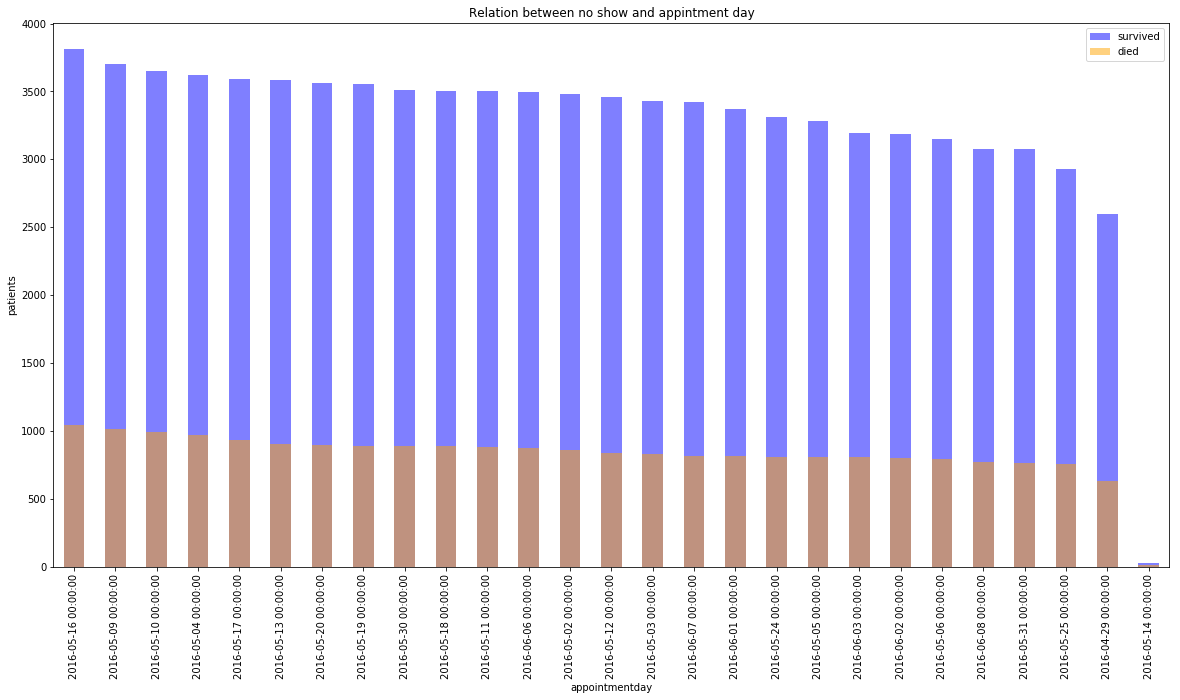

In [24]:
plt.figure(figsize=[20,10])

df.AppointmentDay[show].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived')
df.AppointmentDay[Doesnt_show].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='died')
plt.title("Relation between no show and appintment day")
plt.xlabel("appointmentday")
plt.ylabel("patients")
plt.legend();

### Does patient health situation affect absence (hanecap,daibetes)

### effect of handcap on showing or no showing for the appointment

this result was surprising because the chance of patients with handcap to show is higher than normal patients

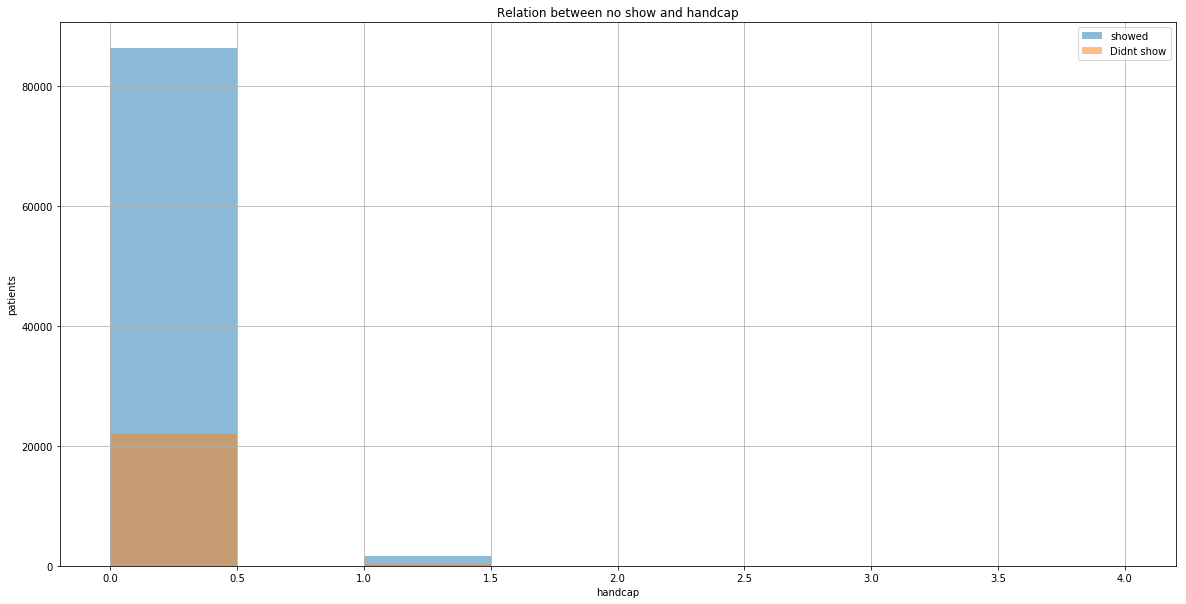

In [25]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.figure(figsize=[20,10])
df.Handcap[show].hist(alpha=0.5, bins=8, label='showed')
df.Handcap[Doesnt_show].hist(alpha=0.5, bins=8, label='Didnt show')
plt.title("Relation between no show and handcap")
plt.xlabel("handcap")
plt.ylabel("patients")
plt.legend();

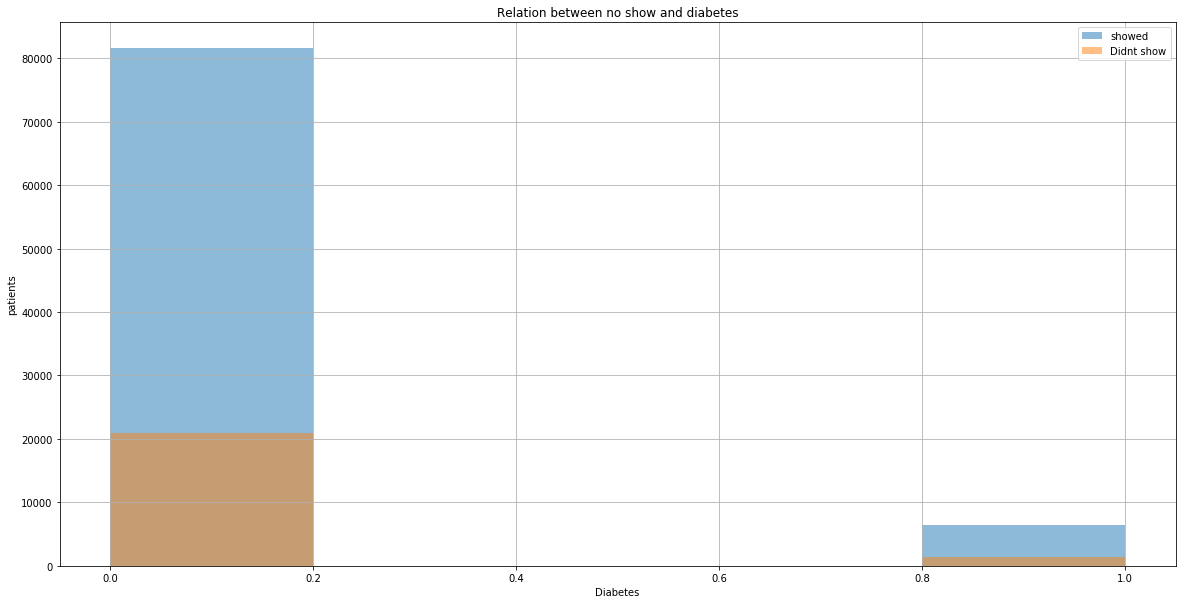

In [27]:
plt.figure(figsize=[20,10])
df.Diabetes[show].hist(alpha=0.5, bins=5, label='showed')
df.Diabetes[Doesnt_show].hist(alpha=0.5, bins=5, label='Didnt show')
plt.title("Relation between no show and diabetes")
plt.xlabel("Diabetes")
plt.ylabel("patients")
plt.legend();

<a id='conclusions'></a>
## Conclusions

> as we can see that patient condition matters we saw that patients who recived the sms or in on certien neibourhood are mostlikely to show for appointmnet,but factors like age or gender doesnt realy matter what was surprising that people with handecap have higher chance to show for appointment than people with no handcap that may be because the have people that carea of them and make sure to be in time for the appintment

> for patient health situation it doenst realy affect.

> so next time we make an appointment we should consider two factor 1- that patient recieved the sms 2-where they live
> so we can estmite whether they are showing or not

>Limitations: This data had wrong values for age and handcap inaddation to there should be data about the wheater in the all days so we can ensure that the reson for no show wasnt due to the whether situation.

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0